In [1]:
import os
import cv2
import numpy as np
import face_recognition
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

file_encodings = 'encodings_aug.npy'
file_names = 'names.npy'
threshold, tolerance = 0.95, 0.6


def importFaceEncoded(filename):
    # with open(filename, 'rb') as f:
    encodeListKnown = np.load(filename)
    print(filename + ' has imported!')
    return encodeListKnown


encodings = importFaceEncoded(file_encodings)
names = importFaceEncoded(file_names)

encodings_aug.npy has imported!
names.npy has imported!


In [2]:
def face_distance(face_encodings, face_to_compare):
    if len(face_encodings) == 0:
        return np.empty((0))
    arr = []
    for face_encoding in face_encodings:
        arr.append(spatial.distance.cosine(face_encoding, face_to_compare))

    return np.array(arr)


val_path = 'datasets/validation'
y_pred, y_true = [], []

print('\nPredicting...\n')
for cl in os.listdir(val_path):
    if cl != '.DS_Store':
        data_dir = val_path + '/' + cl
        if not os.path.isfile(data_dir):
            # print(data_dir)
            for filename in os.listdir(data_dir):
                if filename != '.DS_Store':
                    img = face_recognition.load_image_file(data_dir + '/' + filename)
                    face_enc = face_recognition.face_encodings(img)
                    if face_enc and len(face_enc) == 1:
                        distance = face_distance(encodings, face_enc[0])
                        matchIndex = np.argmin(distance)
                        confidence = 1 - distance[matchIndex]
                        # print(confidence)
                        if distance[matchIndex] <= tolerance and confidence >= threshold:
                            y_pred.append(names[matchIndex])
                        else:
                            y_pred.append('Unknow~')
                        y_true.append(cl)

y_pred = np.array(y_pred)
y_true = np.array(y_true)


Predicting...

datasets/validation/B1709632
datasets/validation/B1707567
datasets/validation/B1812179
datasets/validation/B1907548
datasets/validation/B1905888
datasets/validation/B1907905
datasets/validation/B1906279
datasets/validation/B1804804
datasets/validation/B1907369
datasets/validation/B1911465
datasets/validation/B1905858
datasets/validation/B1605247
datasets/validation/Dc1532m5
datasets/validation/B1709618
datasets/validation/B1911510
datasets/validation/B1810377
datasets/validation/B1808755
datasets/validation/B1804734
datasets/validation/B1909594
datasets/validation/B1904428
datasets/validation/B1605203
datasets/validation/B1905870
datasets/validation/B1811153
datasets/validation/B1907324
datasets/validation/B1808843
datasets/validation/B1905871
datasets/validation/B1911461
datasets/validation/B1811124
datasets/validation/B1911460
datasets/validation/B1509922
datasets/validation/B1809833
datasets/validation/B1901781
datasets/validation/B1905921
datasets/validation/B190951

In [3]:
cnt = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
        cnt += 1
    else:
        print(y_pred[i], y_true[i])
print('Accuracy', cnt/len(y_pred))

Accuracy 1.0


<AxesSubplot:>

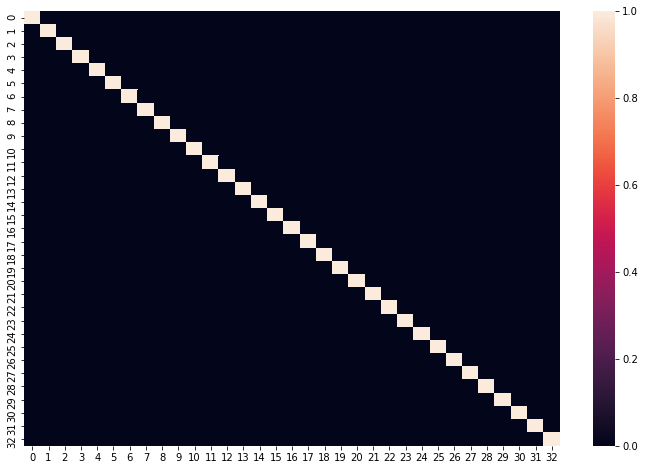

In [4]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(confusion_matrix(y_true, y_pred))